In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd
import seaborn as sb

In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [0]:
x = dados[["preco","idade_do_modelo","km_por_ano"]]
y = dados['vendido']

In [0]:
#situação horrível de azar onde tudo está ordenada

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco","idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]

In [6]:
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [7]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)
CV = 10

model = DummyClassifier()

results = cross_validate(model,x_azar,y_azar, cv=CV )
print(results['test_score'])

[0.518 0.484 0.488 0.523 0.509 0.516 0.521 0.474 0.504 0.502]


In [8]:
print(results['test_score'].mean())

0.5038999999999999


In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)

In [10]:
results = cross_validate(model, x_azar, y_azar, cv=CV)
print(results)

{'fit_time': array([0.01387215, 0.01156044, 0.0107584 , 0.01105404, 0.01067472,
       0.01149106, 0.01165247, 0.01119661, 0.01049829, 0.01099324]), 'score_time': array([0.00127316, 0.0013113 , 0.00150084, 0.00116611, 0.0014832 ,
       0.0012641 , 0.00121403, 0.00115418, 0.00121784, 0.00122643]), 'test_score': array([0.786, 0.804, 0.786, 0.79 , 0.778, 0.759, 0.812, 0.782, 0.777,
       0.796]), 'train_score': array([0.78766667, 0.78566667, 0.78766667, 0.78711111, 0.78855556,
       0.79055556, 0.785     , 0.78811111, 0.78855556, 0.78655556])}


In [11]:
results = cross_validate(model, x, y, cv=CV)
print(results['test_score'].mean())

0.7869000000000002


In [12]:
from sklearn.model_selection import StratifiedKFold #para estratificar

# Aleatoriedade no cross validate
# CV = KFold(n_splits = 10, shuffle = True)

CV = StratifiedKFold(n_splits = 10, shuffle = True) #estratificando, faendo cross validation e escolhendo de forma aleatoria

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = CV)
print(results['test_score'].mean())

0.7576


In [13]:
for i in range(1,33):
  modelo = DecisionTreeClassifier(max_depth=i)
  results = cross_validate(modelo, x, y, cv = CV, return_train_score=True)
  print("Resultado médio de teste com max depth {} : {}".format(i,results['test_score'].mean()))
  print("Resultado médio de treino com max depth {} : {}".format(i,results['train_score'].mean()))

Resultado médio de teste com max depth 1 : 0.7578
Resultado médio de treino com max depth 1 : 0.7579111111111112
Resultado médio de teste com max depth 2 : 0.7577999999999999
Resultado médio de treino com max depth 2 : 0.7579111111111112
Resultado médio de teste com max depth 3 : 0.7871
Resultado médio de treino com max depth 3 : 0.7875444444444444
Resultado médio de teste com max depth 4 : 0.7866
Resultado médio de treino com max depth 4 : 0.787911111111111
Resultado médio de teste com max depth 5 : 0.7858
Resultado médio de treino com max depth 5 : 0.7897222222222222
Resultado médio de teste com max depth 6 : 0.7838
Resultado médio de treino com max depth 6 : 0.7915222222222222
Resultado médio de teste com max depth 7 : 0.7817999999999999
Resultado médio de treino com max depth 7 : 0.7942222222222222
Resultado médio de teste com max depth 8 : 0.7783
Resultado médio de treino com max depth 8 : 0.798588888888889
Resultado médio de teste com max depth 9 : 0.7762
Resultado médio de trein

In [14]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = StratifiedKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])
resultados.head()

,max_depth,train,test
0,1,75.791111,75.78
1,2,75.791111,75.78
2,3,78.754444,78.70
3,4,78.800000,78.63
4,5,78.965556,78.56


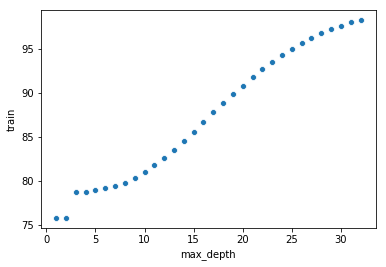

In [16]:
sb.scatterplot(data=resultados, y='train', x='max_depth')

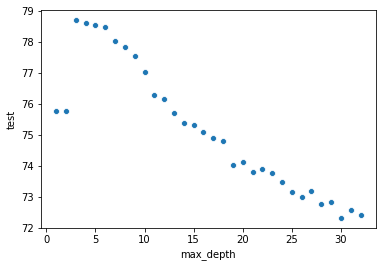

In [17]:
sb.scatterplot(data=resultados, y='test', x='max_depth')

In [20]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.754444,78.70
3,4,78.800000,78.63
4,5,78.965556,78.56
5,6,79.190000,78.49
6,7,79.443333,78.04


In [31]:
best_depth = 0
best_leafs = 0
best_result = 0
best_samples = 0

#ja rodei com i~16 e j~32 e o melhor foi 3x1

for i in range(1,8):
  for j in range(1,16):
    for k in [32,64,128,256]:
      model = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, min_samples_split=k)
      CV = StratifiedKFold(n_splits=10)
      results = cross_validate(model, x_azar, y_azar, cv=CV, return_train_score=True)

      if results['test_score'].mean() > best_result:
        best_result = results['test_score'].mean()
        best_depth = i
        best_leafs = j
        best_samples = k
      
print("Melhor resultado : Profundidade {} com {} Folhas e com {} Splits com acurácia {}".format(best_depth, best_leafs, best_samples, best_result.round(4)))
    

Melhor resultado : Profundidade 3 com 1 Folhas e com 32 Splits com acurácia 0.787


In [35]:


def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = StratifiedKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791111,75.78,0.005503,0.000976
1,1,32,64,75.791111,75.78,0.005260,0.000991
2,1,32,128,75.791111,75.78,0.005224,0.000956
3,1,32,256,75.791111,75.78,0.005198,0.000961
4,1,64,32,75.791111,75.78,0.005212,0.000948
